# Analysis for training A2C on CartPole-v1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

## Analyse training results

In [2]:
training_results_df = pd.read_csv("training_results_v1_20210405-225734.csv")
training_results_df.head(3)

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
0,0,20210405-225734,120.040745,6,50000,0.001,"(32, 32)",21.3,139.2,77.298,26.496034,-0.110349,2.357820,-3.229935,2.244258
1,1,20210405-225734,126.651532,6,50000,0.001,"(64, 64)",15.1,184.4,90.304,37.076801,-0.098310,1.974039,-3.166619,1.872550
2,2,20210405-225734,129.786307,6,50000,0.001,"(128, 128)",15.4,202.4,99.636,35.883354,-0.102363,1.819861,-3.137222,1.714351


In [3]:
training_results_df["reward_variance"].describe()

count    54.000000
mean     47.412141
std      11.103552
min      26.496034
25%      39.232841
50%      46.647560
75%      54.323945
max      75.396052
Name: reward_variance, dtype: float64

In [49]:
# Understand the min-max or ranges of each column
training_results_df.describe()

,index,wall_time,num_env,num_episodes,learning_rate,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,254.146193,14.000000,75000.000000,0.002000,21.538889,254.466667,129.755833,47.412141,-0.060404,1.264170,-3.085134,1.200674
std,15.732133,101.020067,7.553582,25234.746934,0.000824,5.288200,55.314500,25.118622,11.103552,0.038657,0.410469,0.054599,0.379076
min,0.000000,120.040745,6.000000,50000.000000,0.001000,14.000000,139.200000,77.298000,26.496034,-0.121898,0.601505,-3.229935,0.580744
25%,13.250000,166.045827,6.000000,50000.000000,0.001000,17.725000,206.375000,109.437000,39.232841,-0.101660,0.955550,-3.122550,0.909378
50%,26.500000,239.612595,12.000000,75000.000000,0.002000,20.150000,253.100000,134.018000,46.647560,-0.056969,1.215598,-3.087203,1.148685
75%,39.750000,322.239726,24.000000,100000.000000,0.003000,24.975000,295.100000,151.260250,54.323945,-0.020609,1.587016,-3.042439,1.479692
max,53.000000,439.601978,24.000000,100000.000000,0.003000,37.900000,357.400000,177.633000,75.396052,0.004068,2.357820,-2.964169,2.244258


## Plot metrics to compare models

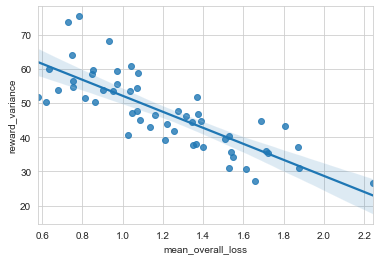

In [93]:
# First, is there a correlation between reward_variance and mean_overall_loss?
sns.regplot(data=training_results_df, x="mean_overall_loss", y="reward_variance");
# So: Reward variance goes down as mean_overall_loss increases!

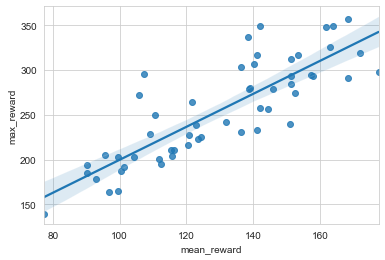

In [94]:
# Is there a correlation between max_reward and mean_reward?
sns.regplot(data=training_results_df, x="mean_reward", y="max_reward");
# So: There is a positive correlation

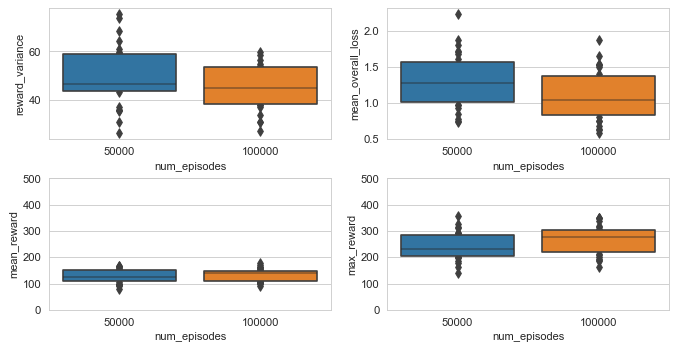

In [54]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=training_results_df, x="num_episodes", y="reward_variance");

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=training_results_df, x="num_episodes", y="mean_overall_loss");

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=training_results_df, x="num_episodes", y="mean_reward");
plt.ylim([0, 500]);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=training_results_df, x="num_episodes", y="max_reward");
plt.ylim([0, 500]);
# plt.title("Comparison of A2C models trained on CartPole-v1");
# Reward variance and mean overall loss is much lower learning on a higher number of episodes.
# Mean rewards don't change much, but max rewards are a little higher with a higher number of episodes.
# So: Based on the lower reward_variance and mean overall loss, we favour a model trained on 100000 episodes.

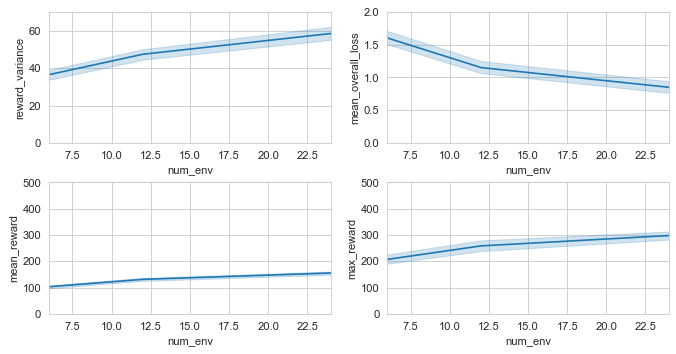

In [65]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.lineplot(data=training_results_df, x="num_env", y="reward_variance");
plt.ylim([0, 70]);
plt.xlim([6, 24]);

ax2 = fig.add_subplot(2, 2, 2)
sns.lineplot(data=training_results_df, x="num_env", y="mean_overall_loss");
plt.ylim([0, 2.0]);
plt.xlim([6, 24]);

ax3 = fig.add_subplot(2, 2, 3)
sns.lineplot(data=training_results_df, x="num_env", y="mean_reward");
plt.ylim([0, 500]);
plt.xlim([6, 24]);

ax4 = fig.add_subplot(2, 2, 4)
sns.lineplot(data=training_results_df, x="num_env", y="max_reward");
plt.ylim([0, 500]);
plt.xlim([6, 24]);

# Notes: High num_envs = lowest overall loss, highest mean and max reward, but highest variance.
# Reward variance doubles going from 6 to 24 environments, but mean overall loss drops.
# Mean reward rises by about 50%, and max rewards increase by about 30%.
# So: Based on mean overall loss, max reward and mean reward, we will favour a model trained 
# on more environments, but we will be cautious about reward variance.

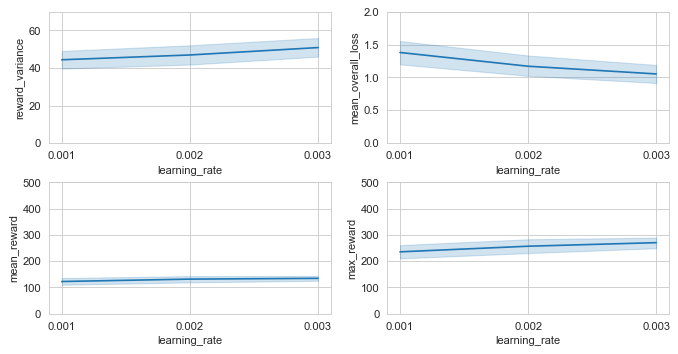

In [63]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.lineplot(data=training_results_df, x="learning_rate", y="reward_variance");
plt.ylim([0, 70]);
plt.xticks([0.001, 0.002, 0.003]);

ax2 = fig.add_subplot(2, 2, 2)
sns.lineplot(data=training_results_df, x="learning_rate", y="mean_overall_loss");
plt.ylim([0, 2.0]);
plt.xticks([0.001, 0.002, 0.003]);

ax3 = fig.add_subplot(2, 2, 3)
sns.lineplot(data=training_results_df, x="learning_rate", y="mean_reward");
plt.ylim([0, 500]);
plt.xticks([0.001, 0.002, 0.003]);

ax4 = fig.add_subplot(2, 2, 4)
sns.lineplot(data=training_results_df, x="learning_rate", y="max_reward");
plt.ylim([0, 500]);
plt.xticks([0.001, 0.002, 0.003]);

# A rise in reward variance and notable drop in mean overall loss with a higher learning rate.
# Slight increase in mean reward and a slightly bigger rise in max reward with higher learning rate.
# So: Based on the mean overall loss and max reward, we will favour a model with higher learning rate,
# but again be cautious of the increase in reward variance.

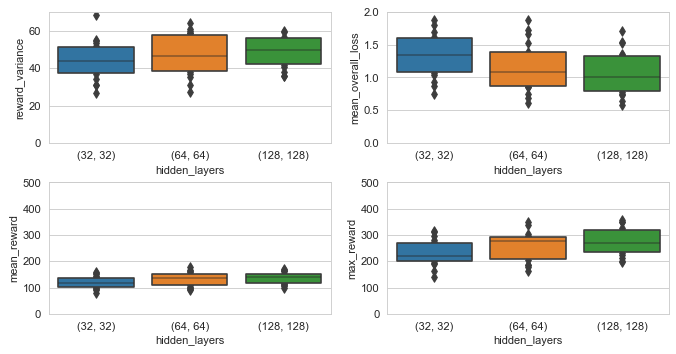

In [66]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="reward_variance");
plt.ylim([0, 70]);

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="mean_overall_loss");
plt.ylim([0, 2.0]);

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="mean_reward");
plt.ylim([0, 500]);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="max_reward");
plt.ylim([0, 500]);

# Highest reward variance with 64 neurons
# Lowest mean loss with 128 neurons
# Mean reward higher but tied between 64 and 128 neurons
# Max reward highest with 128 neurons
# So: Based on mean overall loss and max reward, we will favour a model with 128 neurons,
# and based on reward variance, 128 neurons may be an acceptable tradeoff.

## Selecting the best model

Plotted reward_variance, mean_overall_loss, mean_reward and max_reward against our hyperparameters.

Our observations:

On metrics:
- Reward variance goes down as mean_overall_loss increases
- There is a positive correlation between max_reward and mean_reward

On number of episodes:
- Reward variance and mean overall loss is much lower learning on a higher number of episodes.
- Mean rewards don't change much, but max rewards are a little higher with a higher number of episodes.

So: Based on the lower reward_variance and mean overall loss, we favour a model trained on **100000 episodes**.

On number of environments:
- Reward variance doubles going from 6 to 24 environments, but mean overall loss drops.
- Mean reward rises by about 50%, and max rewards increase by about 30%.

So: Based on mean overall loss, max reward and mean reward, we will favour a model trained on **more environments**, but we will be cautious about reward variance.

On learning rate:
- A rise in reward variance and notable drop in mean overall loss with a higher learning rate.
- Slight increase in mean reward and a slightly bigger rise in max reward with higher learning rate.

So: Based on the mean overall loss and max reward, we will favour a model with **higher learning rate**, but again be cautious of the increase in reward variance.

On size of the hidden layer:
- Highest reward variance with 64 neurons
- Lowest mean loss with 128 neurons
- Mean reward higher but tied between 64 and 128 neurons
- Max reward highest with 128 neurons

So: Based on mean overall loss and max reward, we will favour a model with **128 neurons**, and based on reward variance, 128 neurons may be an acceptable tradeoff.

So our best model looks like:
- num_episodes 100000
- hidden_layers 128
- highest num_env then learning_rate (because of the bigger improvements on num_env)
- lowest mean_overall_loss
- max_reward?


In [96]:
# Num environments:
df1 =  training_results_df[training_results_df["num_episodes"]==100000]
df2 = df1[df1["hidden_layers"]=="(128, 128)"]
df3 = df2.sort_values(by=["num_env", "learning_rate"], ascending=False).head(10)
df4 = df3.sort_values(by=["mean_overall_loss"], ascending=True)
df4

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
53,53,20210405-225734,423.192914,24,100000,0.003,"(128, 128)",37.9,307.1,140.426,51.644749,-0.017766,0.601505,-2.978573,0.580744
50,50,20210405-225734,433.807385,24,100000,0.002,"(128, 128)",28.8,348.3,161.838,59.924182,-0.020370,0.657104,-3.025075,0.633699
47,47,20210405-225734,439.600475,24,100000,0.001,"(128, 128)",20.2,319.1,172.089,56.365427,-0.021326,0.776993,-3.064115,0.752594
35,35,20210405-225734,325.486098,12,100000,0.003,"(128, 128)",28.1,278.8,146.047,51.516152,-0.050682,0.864392,-2.964169,0.810711
32,32,20210405-225734,323.056237,12,100000,0.002,"(128, 128)",29.7,349.5,141.940,53.722239,-0.057238,0.961843,-3.041728,0.901568
29,29,20210405-225734,324.422943,12,100000,0.001,"(128, 128)",21.8,257.2,142.047,47.147075,-0.060509,1.108949,-3.095934,1.045347
17,17,20210405-225734,278.860747,6,100000,0.003,"(128, 128)",27.5,250.0,110.568,41.704762,-0.099550,1.356506,-3.016585,1.253947
14,14,20210405-225734,258.686785,6,100000,0.002,"(128, 128)",20.1,211.2,115.377,37.827841,-0.106857,1.460964,-3.039172,1.351039
11,11,20210405-225734,253.780457,6,100000,0.001,"(128, 128)",14.5,295.2,107.285,40.436986,-0.111301,1.643224,-3.122679,1.528793


In [98]:
training_results_df.describe()

,index,wall_time,num_env,num_episodes,learning_rate,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,254.146193,14.000000,75000.000000,0.002000,21.538889,254.466667,129.755833,47.412141,-0.060404,1.264170,-3.085134,1.200674
std,15.732133,101.020067,7.553582,25234.746934,0.000824,5.288200,55.314500,25.118622,11.103552,0.038657,0.410469,0.054599,0.379076
min,0.000000,120.040745,6.000000,50000.000000,0.001000,14.000000,139.200000,77.298000,26.496034,-0.121898,0.601505,-3.229935,0.580744
25%,13.250000,166.045827,6.000000,50000.000000,0.001000,17.725000,206.375000,109.437000,39.232841,-0.101660,0.955550,-3.122550,0.909378
50%,26.500000,239.612595,12.000000,75000.000000,0.002000,20.150000,253.100000,134.018000,46.647560,-0.056969,1.215598,-3.087203,1.148685
75%,39.750000,322.239726,24.000000,100000.000000,0.003000,24.975000,295.100000,151.260250,54.323945,-0.020609,1.587016,-3.042439,1.479692
max,53.000000,439.601978,24.000000,100000.000000,0.003000,37.900000,357.400000,177.633000,75.396052,0.004068,2.357820,-2.964169,2.244258


So we should choose the model index 53, with num_episodes 100000, hidden_layers 128, num_env 24 and learning_rate 0.003 

Based on:
- The order of priorities above
- Reward variance, because at 51.64 it is at least well below the 3/4th percentile in the results.
- Max reward is not the highest in this vicinity, but at 307.1 it is not far from the max of 357.4 in the dataset.

In [97]:
# Export these final candidates to a CSV for report
df4.to_csv("best_model_results_v1_20210405-225734.csv", index=False)

In [69]:
# highest_mean_reward_df = training_results_df.sort_values(by=["mean_reward"], ascending=False).head(10)
# lowest_reward_variance_df = highest_mean_reward_df.sort_values(by=["reward_variance"], ascending=True)
# highest_max_reward_df = lowest_reward_variance_df.sort_values(by=["max_reward"], ascending=False)
# lowest_mean_overall_loss_df = highest_max_reward_df.sort_values(by=["mean_overall_loss"], ascending=True)
# lowest_mean_overall_loss_df

### interesting fact: convergences decreases after the 50th 000 episode.. why?

not really fair comparison with the 50000 based epidoe

single vs multiple worker

